<a href="https://colab.research.google.com/github/mrMichalR/blueberry_yield/blob/main/blueberry_yield_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandasai
!pip install pandas_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.7.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
  Using cached pandas-2.0.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.3
    Uninstalling matplotlib-3.6.3:
      Successfully uninstalled matplotlib-3.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython~=7.34.0, but you have ipython 8.13.2 which is incompatible.
google-colab 1.0.0 requires pandas~=1.5.3, but you have pandas 2.0.1 which is incompatible.
ydata-profiling 4.1.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pandas-1.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Using cached matplotlib-3.6.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.8 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.1
    Uninstalling pandas-2.0.1:
      Successfully uninstalled pandas-2.0.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython~=7.34.0, but you have ipython 8.13.2 which is incompatible.
pandasai 0.2.11 requires matplotlib<4.0.0,>=3.7.1, but you have matplotlib 3.6.3 which is incompatible.
pandasai

# Libraries

In [36]:
import pandas as pd
from pandasai import PandasAI
from tqdm import tqdm, trange
import numpy as np
from numpy import std
import seaborn as sns
from matplotlib import pyplot
import os, sys
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from pandas import set_option
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

# Data load

In [3]:
url_train ='https://raw.githubusercontent.com/mrMichalR/blueberry_yield/main/data/train.csv'
url_test = 'https://raw.githubusercontent.com/mrMichalR/blueberry_yield/main/data/test.csv'
df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)
df_train

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15284,15284,12.5,0.25,0.25,0.38,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.556302,0.476308,40.546480,7667.83619
15285,15285,12.5,0.25,0.25,0.25,0.50,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.354413,0.388145,29.467434,3680.56025
15286,15286,25.0,0.50,0.25,0.38,0.75,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.422548,0.416786,32.299059,4696.44394
15287,15287,25.0,0.50,0.25,0.63,0.63,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.542170,0.434133,36.674243,6772.93347


# EDA

## Pandas profiling

In [4]:
prof = ProfileReport(df_train, minimal=True)
prof.to_file(output_file=f'ProfileReport.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Descriptive analysis

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

In [6]:
df_train.describe(include='all')

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000
mean,7644.000000,19.704690,0.389314,0.286768,0.492675,0.592355,82.169887,49.673281,68.656256,59.229538,28.660553,48.568500,18.660865,0.324176,0.502741,0.446553,36.164950,6025.193999
std,4413.698468,6.595211,0.361643,0.059917,0.148115,0.139489,9.146703,5.546405,7.641807,6.610640,3.195367,5.390545,11.657582,0.163905,0.074390,0.037035,4.031087,1337.056850
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1945.530610
25%,3822.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.458246,0.419216,33.232449,5128.163510
50%,7644.000000,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.506600,0.446570,36.040675,6117.475900
75%,11466.000000,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.560445,0.474134,39.158238,7019.694380
max,15288.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401840


In [7]:
df_train.nunique()

id                      15289
clonesize                   6
honeybee                    7
bumbles                    11
andrena                    16
osmia                      14
MaxOfUpperTRange            6
MinOfUpperTRange            5
AverageOfUpperTRange        5
MaxOfLowerTRange            6
MinOfLowerTRange            7
AverageOfLowerTRange        5
RainingDays                 6
AverageRainingDays          8
fruitset                 1526
fruitmass                1515
seeds                    2066
yield                     776
dtype: int64

In [8]:
df_train.isnull().any()

id                      False
clonesize               False
honeybee                False
bumbles                 False
andrena                 False
osmia                   False
MaxOfUpperTRange        False
MinOfUpperTRange        False
AverageOfUpperTRange    False
MaxOfLowerTRange        False
MinOfLowerTRange        False
AverageOfLowerTRange    False
RainingDays             False
AverageRainingDays      False
fruitset                False
fruitmass               False
seeds                   False
yield                   False
dtype: bool

In [9]:
# df_train.duplicated().sum()
# df_train.duplicated(subset='yield', keep=False)

# or 

# calculate duplicates
dups = df_train.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(df_train[dups])
# print(df[dups].columns)

False
Empty DataFrame
Columns: [id, clonesize, honeybee, bumbles, andrena, osmia, MaxOfUpperTRange, MinOfUpperTRange, AverageOfUpperTRange, MaxOfLowerTRange, MinOfLowerTRange, AverageOfLowerTRange, RainingDays, AverageRainingDays, fruitset, fruitmass, seeds, yield]
Index: []


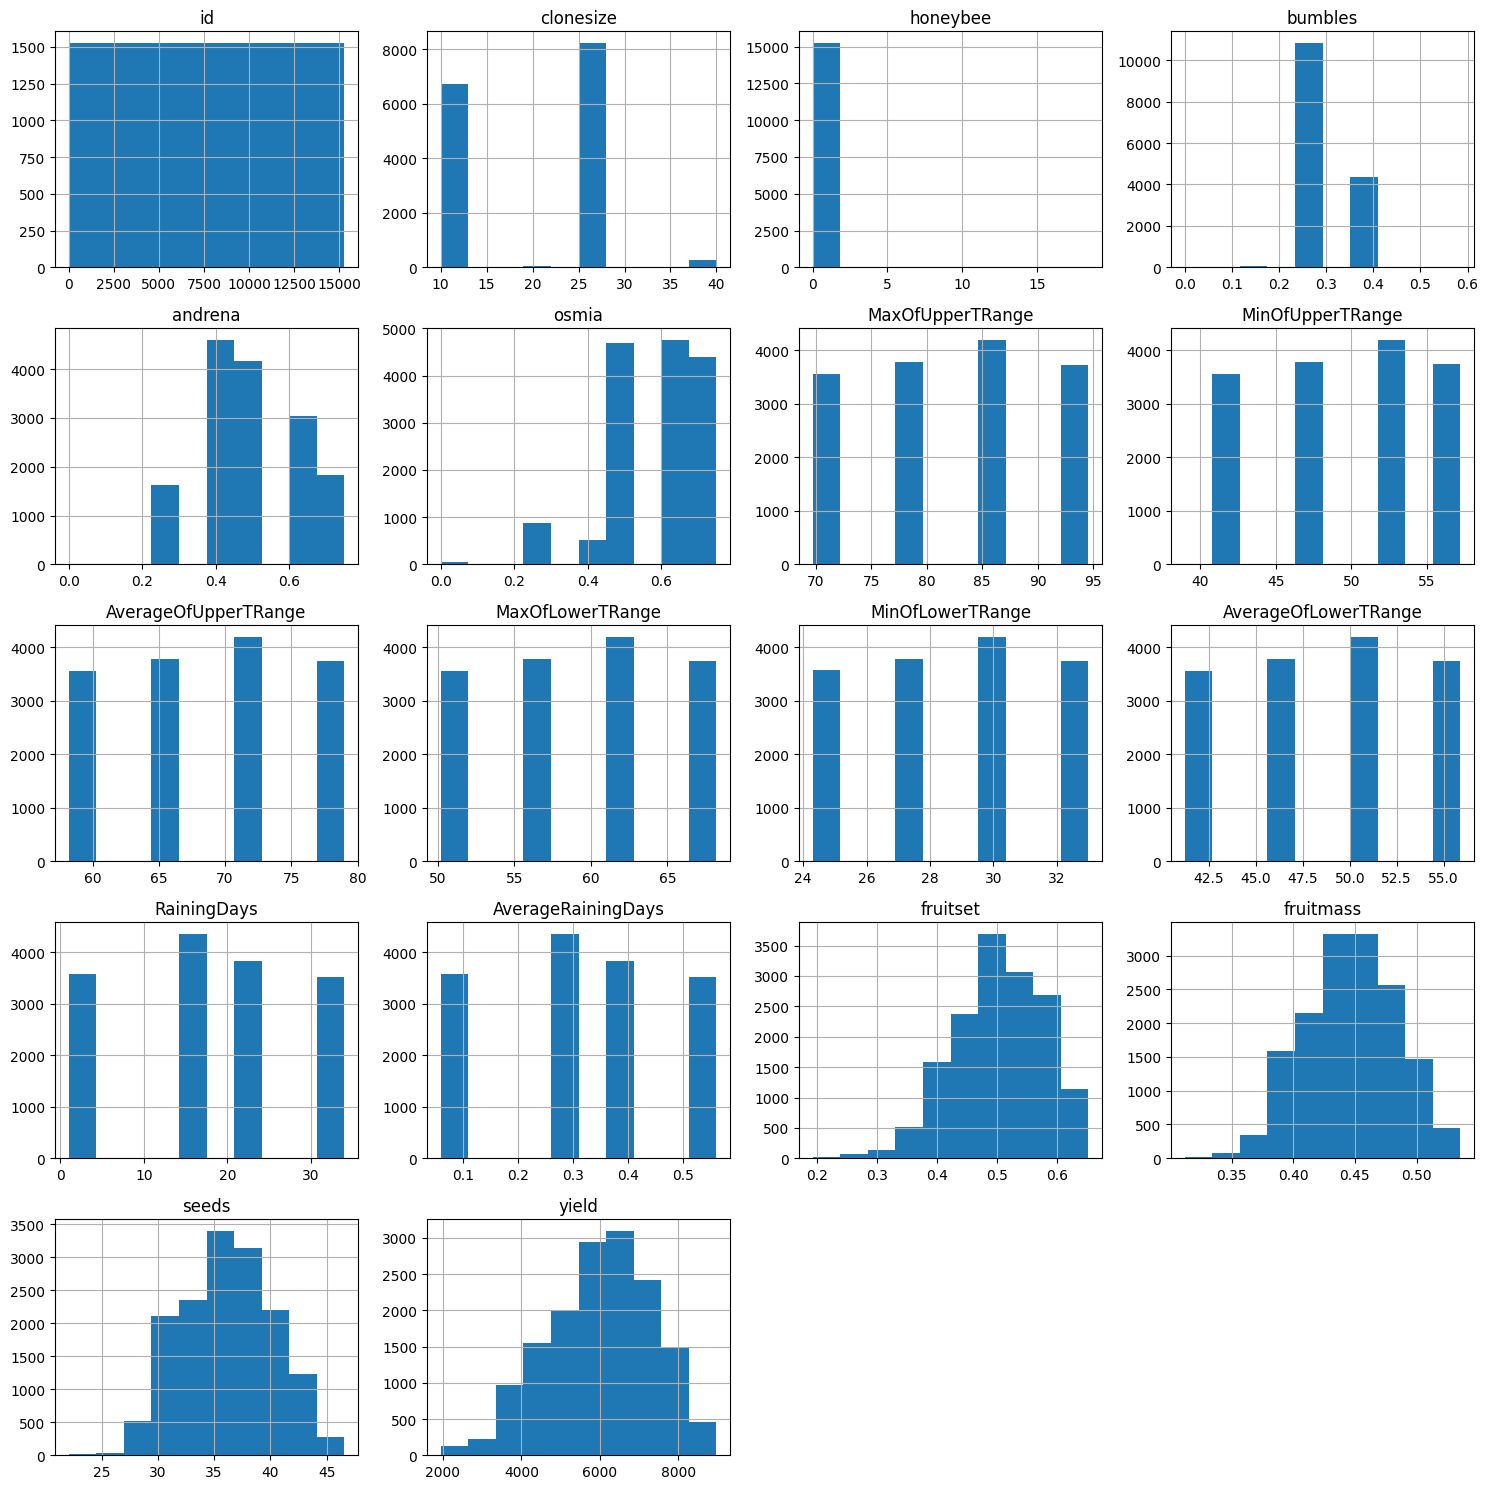

In [10]:
# histograms of each attribute to get a sense of the data distributions
df_train.hist(figsize=(15,15), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

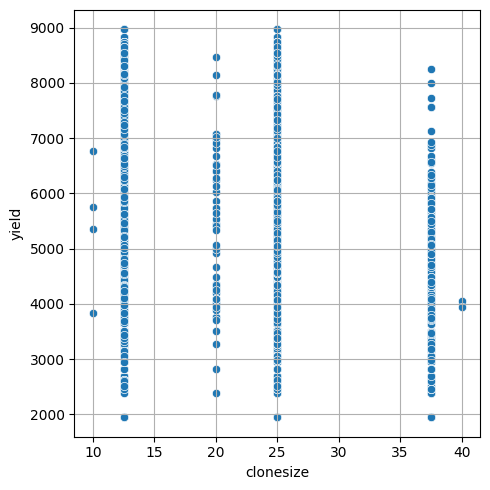

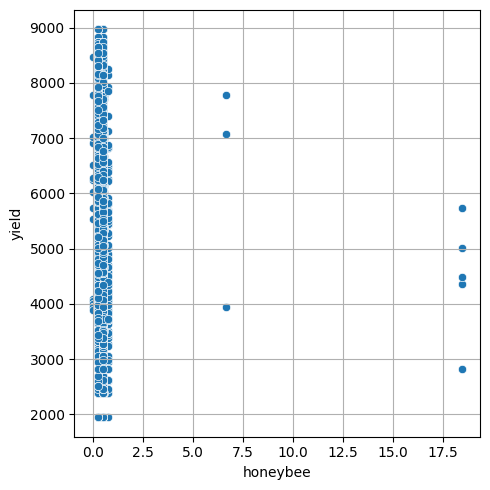

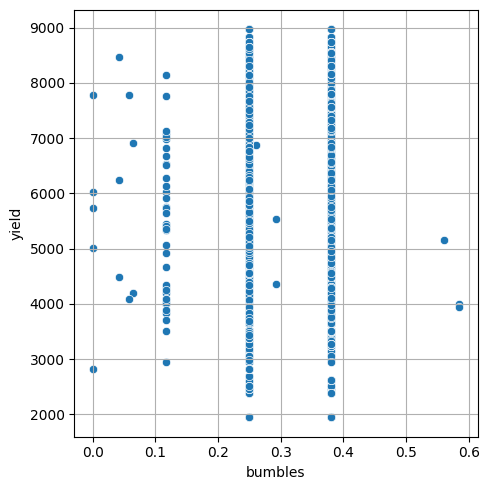

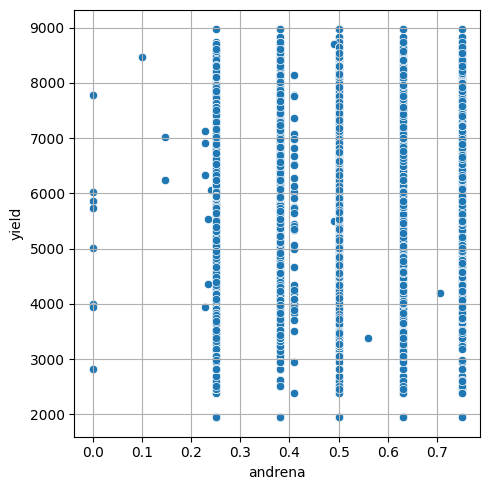

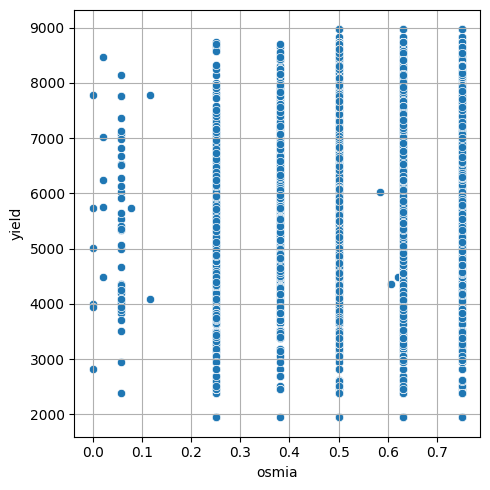

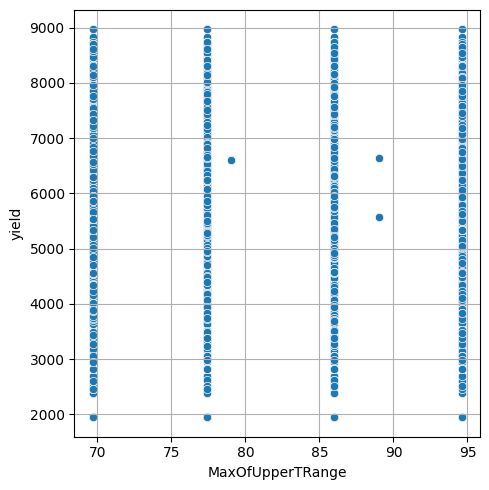

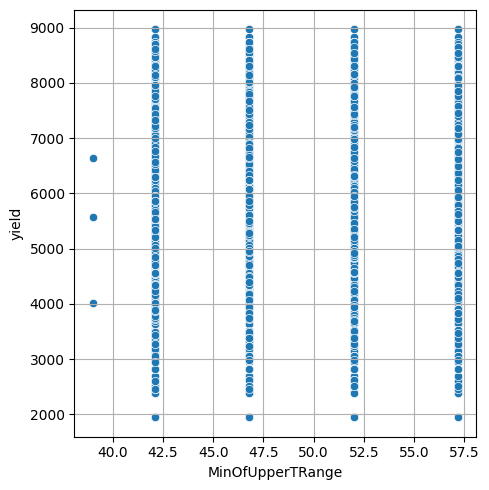

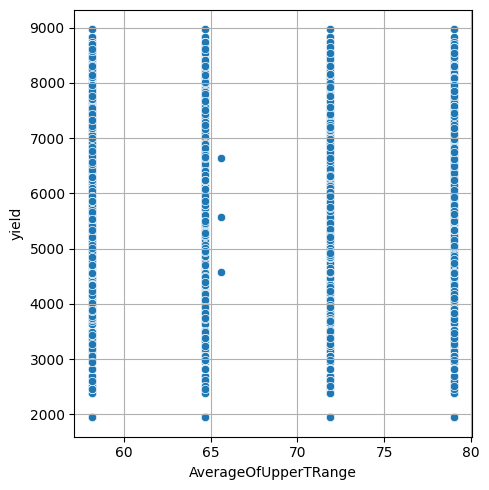

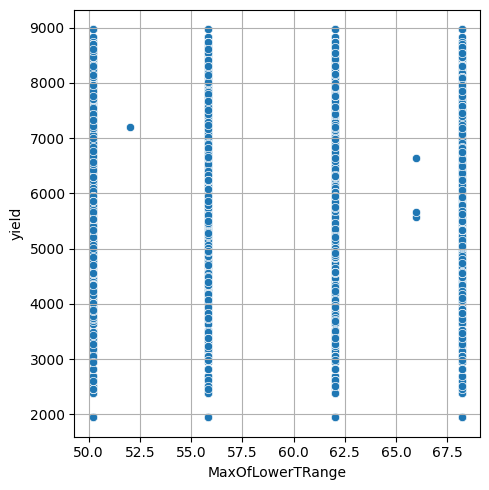

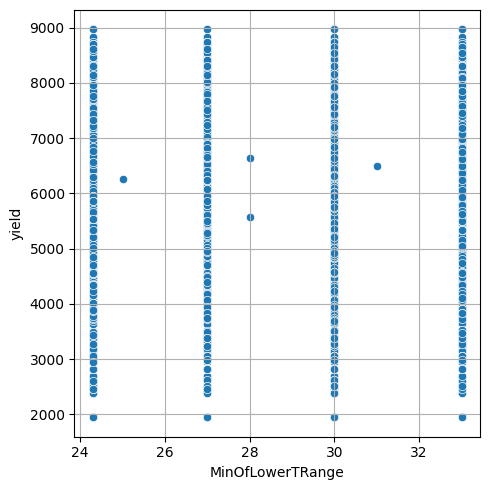

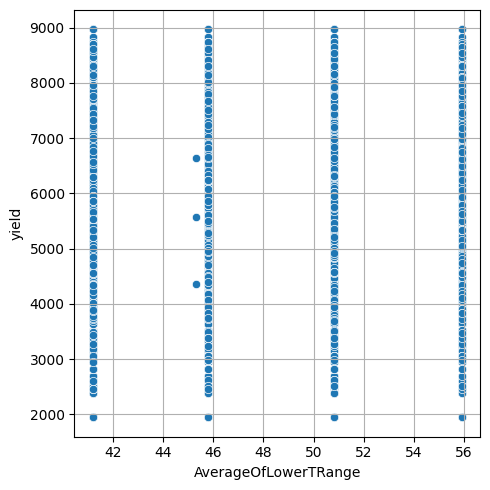

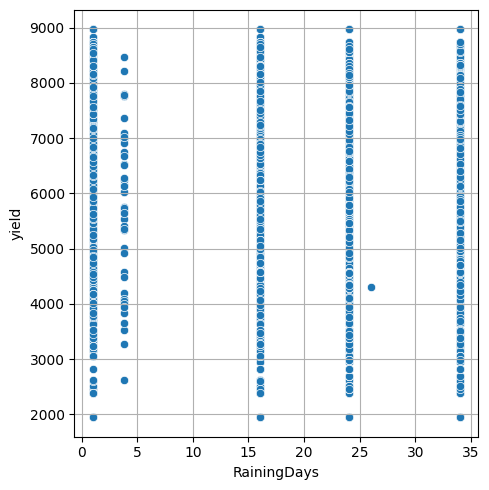

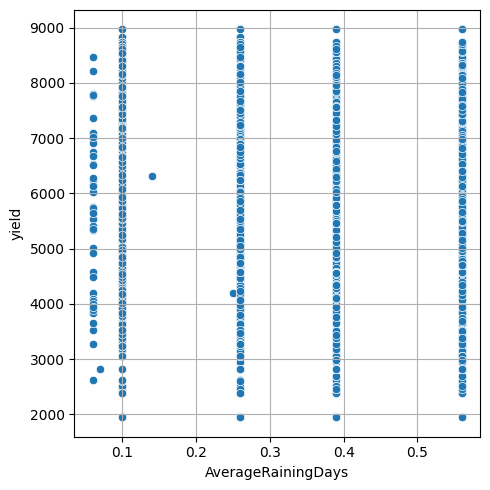

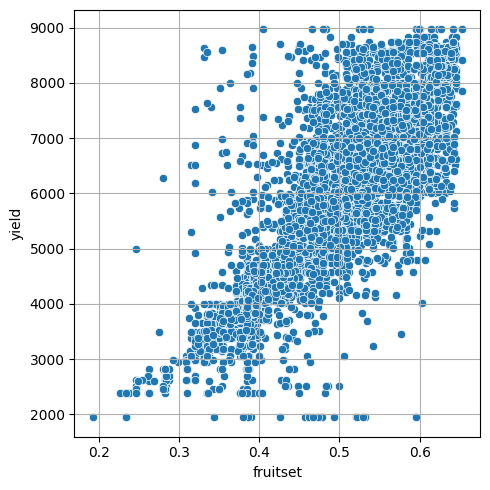

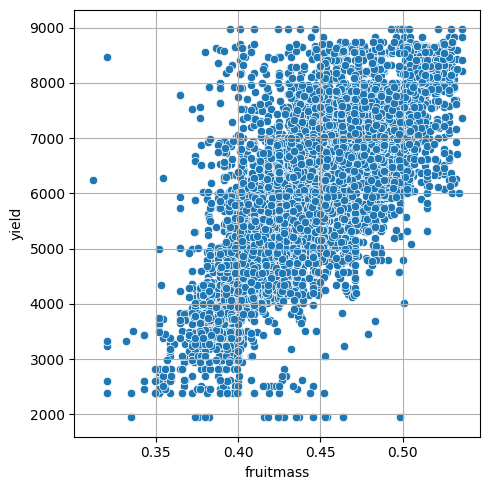

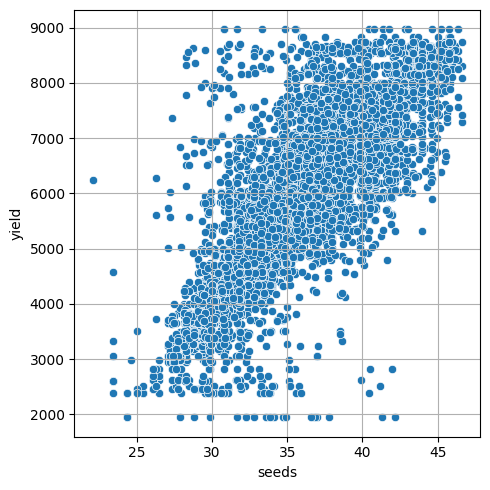

In [11]:
for col in df_train.columns[1:17]:
  plt.subplots(figsize=(5, 5))
  sns.scatterplot(data=df_train, x=col, y='yield', hue=None, size=None, style=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, legend='auto', ax=None)
  plt.tight_layout()
  plt.grid()
  plt.show()

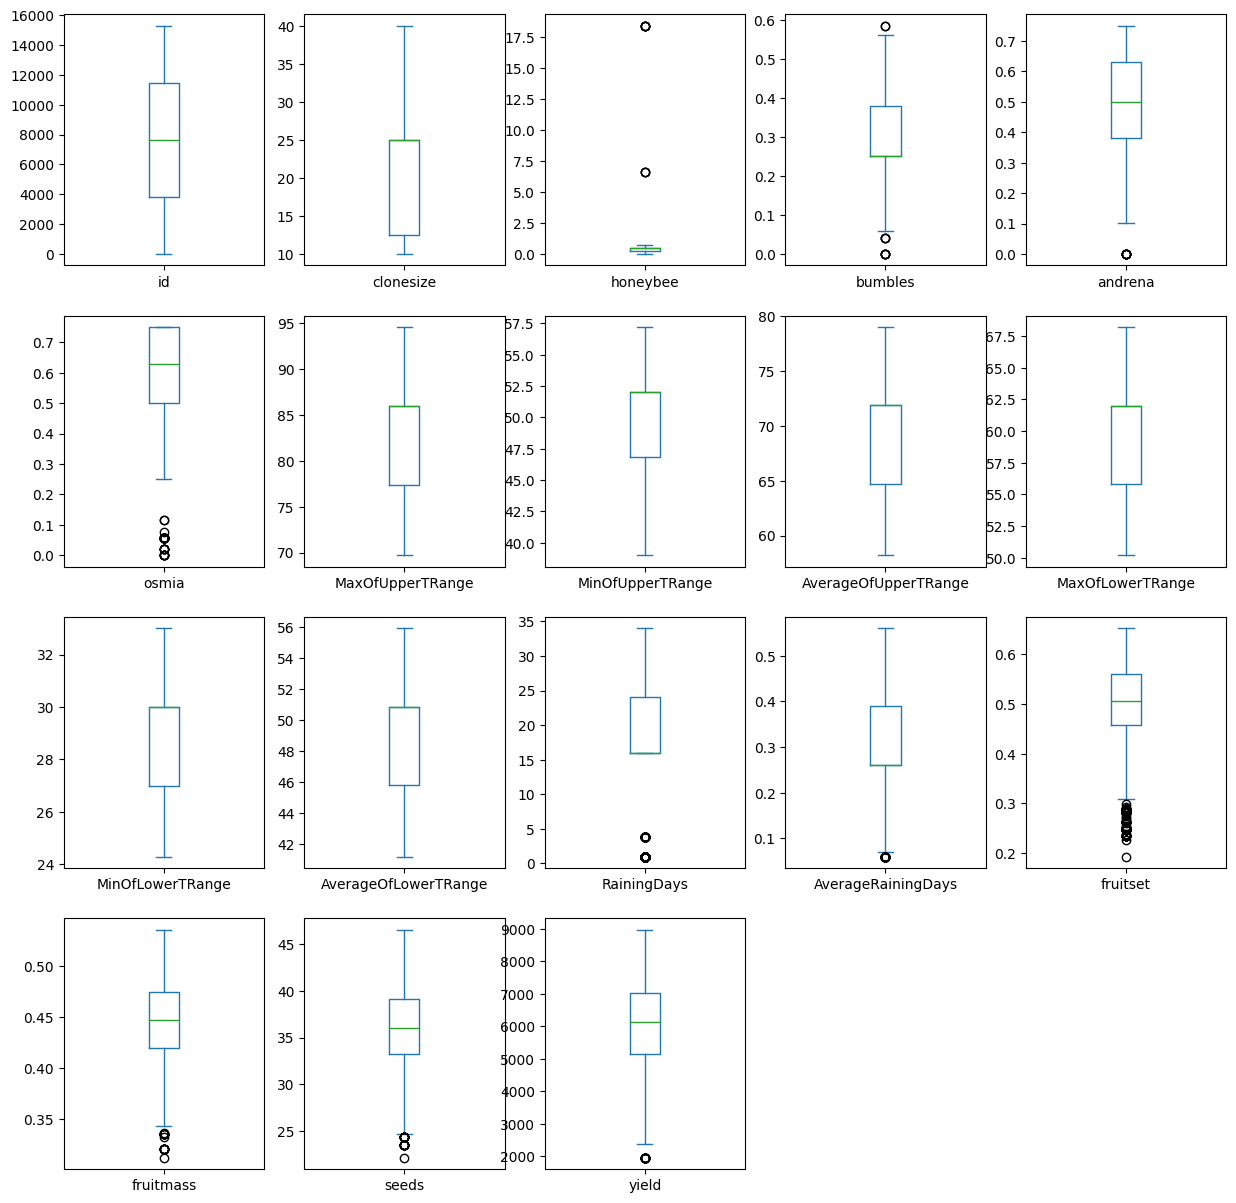

In [12]:
# box and whisker plots
df_train.plot(kind='box', figsize=(15,15), subplots=True, layout=(4,5), sharex=False, sharey=False)
plt.show()

In [13]:
df_train['honeybee'].value_counts()

0.500     7832
0.250     7285
0.750      110
0.537       38
0.000       16
18.430       5
6.640        3
Name: honeybee, dtype: int64

In [14]:
# # correlation
# set_option('display.precision', 3)
# print(df.corr(method='pearson'))

<AxesSubplot: >

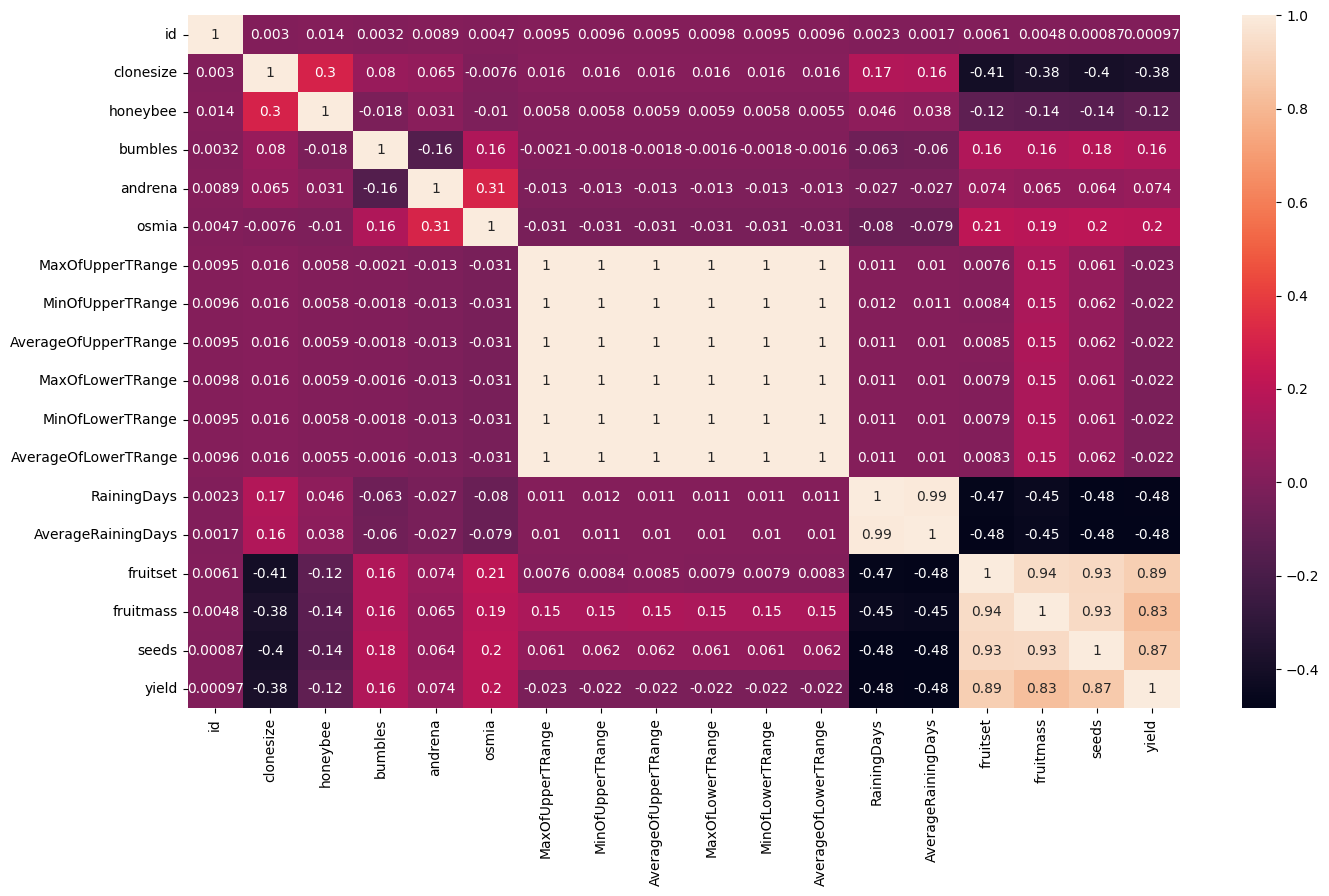

In [15]:
plt.rcParams["figure.figsize"] = [16,9]
sns.heatmap(df_train.corr(method='pearson'), annot=True)

In [16]:
cor = df_train.corr(method='pearson').abs().unstack()

cor_sort = cor.sort_values(kind="quicksort", ascending=False)
print(cor_sort['yield'])

yield                   1.000000
fruitset                0.885967
seeds                   0.868853
fruitmass               0.826481
AverageRainingDays      0.483870
RainingDays             0.477191
clonesize               0.382619
osmia                   0.198264
bumbles                 0.161145
honeybee                0.118001
andrena                 0.073969
MaxOfUpperTRange        0.022517
MinOfLowerTRange        0.022319
MaxOfLowerTRange        0.022197
AverageOfLowerTRange    0.022081
AverageOfUpperTRange    0.021940
MinOfUpperTRange        0.021929
id                      0.000975
dtype: float64


SUMMARY:
- cols to drop or keep one of them:

MaxOfUpperTRange<br>
MinOfUpperTRange<br>
AverageOfUpperTRange<br>
MaxOfLowerTRange<br>
MinOfLowerTRange<br>
AverageOfLowerTRange<br>

- keep one col of fruitset, fruitmass, seeds. Rest drop 
- keep one col of RainingDays, AvarageRainingDays. Rest drop 
- CloneSize to drop?

# Data preprocessing

In [17]:
# col_drop = [
# 'MaxOfUpperTRange',
# 'MinOfUpperTRange',
# 'AverageOfUpperTRange',
# 'MaxOfLowerTRange',
# 'MinOfLowerTRange',
# 'AverageOfLowerTRange',
# 'id'
# ]

# df.drop(col_drop, axis=1)

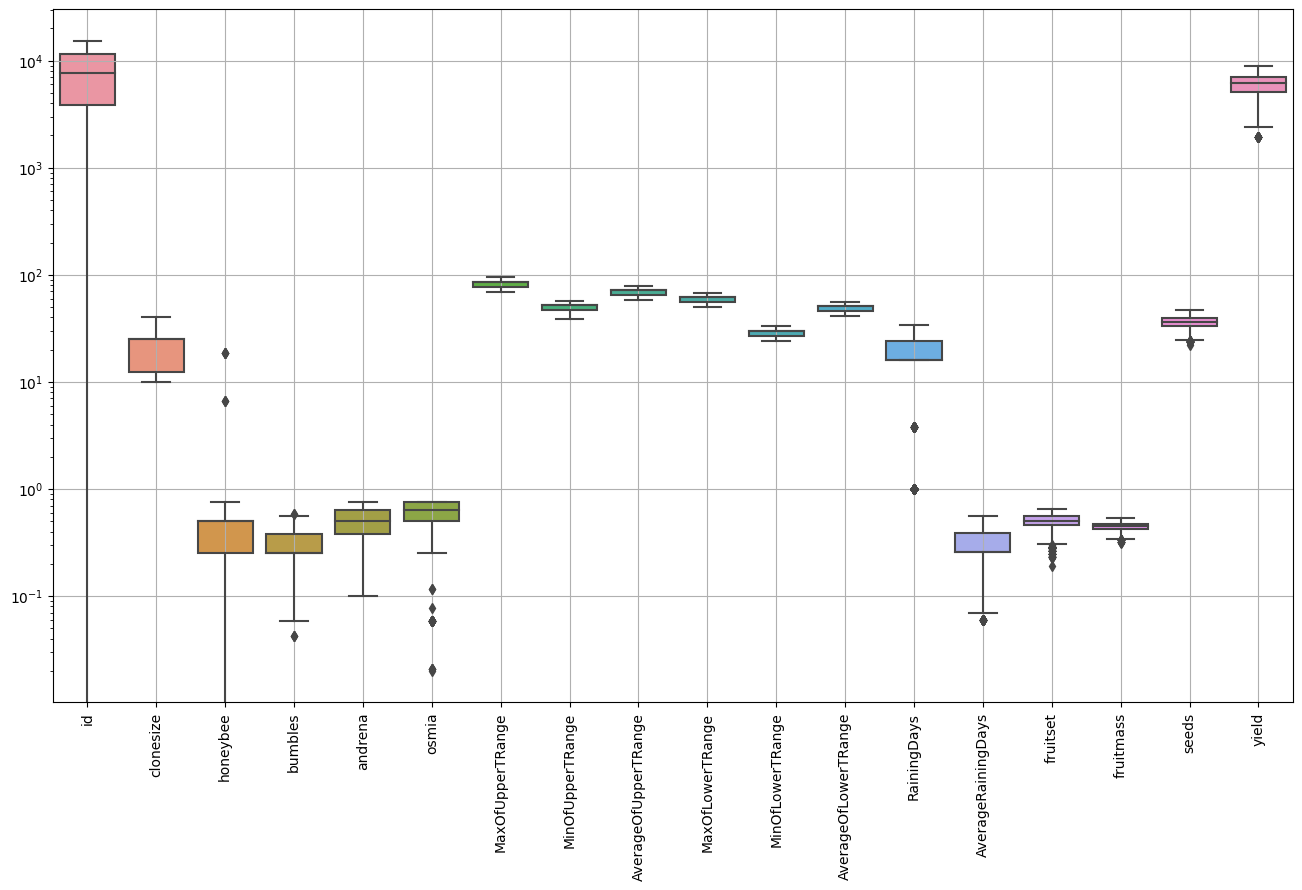

In [18]:
ax = sns.boxplot(data=df_train, orient="v", showfliers=True)
# ax.set_ylim()
ax.set_yscale("log")
plt.xticks(rotation = 90)
plt.grid(visible=True, which='major', axis='both')

# Feature selection

In [19]:
# feature selection
def select_features(X_train, y_train, X_test):
  # configure to select all features
  fs = SelectKBest(score_func=f_regression, k='all')
  # learn relationship from training data
  fs.fit(X_train, y_train)
  # transform train input data
  X_train_fs = fs.transform(X_train)
  # transform test input data
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs


# mutual feature selection
def select_features_mutual(X_train, y_train, X_test):
  # configure to select all features
  fs_mut = SelectKBest(score_func=mutual_info_regression, k='all')
  # learn relationship from training data
  fs_mut.fit(X_train, y_train)
  # transform train input data
  X_train_fs_mut = fs.transform(X_train)
  # transform test input data
  X_test_fs_mut = fs.transform(X_test)
  return X_train_fs_mut, X_test_fs_mut, fs_mut

Feature 0: 0.014523
Feature 1: 2621.792392
Feature 2: 215.866160
Feature 3: 407.549498
Feature 4: 84.102700
Feature 5: 625.500868
Feature 6: 7.754599
Feature 7: 7.354545
Feature 8: 7.361982
Feature 9: 7.535388
Feature 10: 7.619090
Feature 11: 7.456841
Feature 12: 4507.417339
Feature 13: 4673.316195
Feature 14: 55794.500327
Feature 15: 32947.702021
Feature 16: 47084.926978


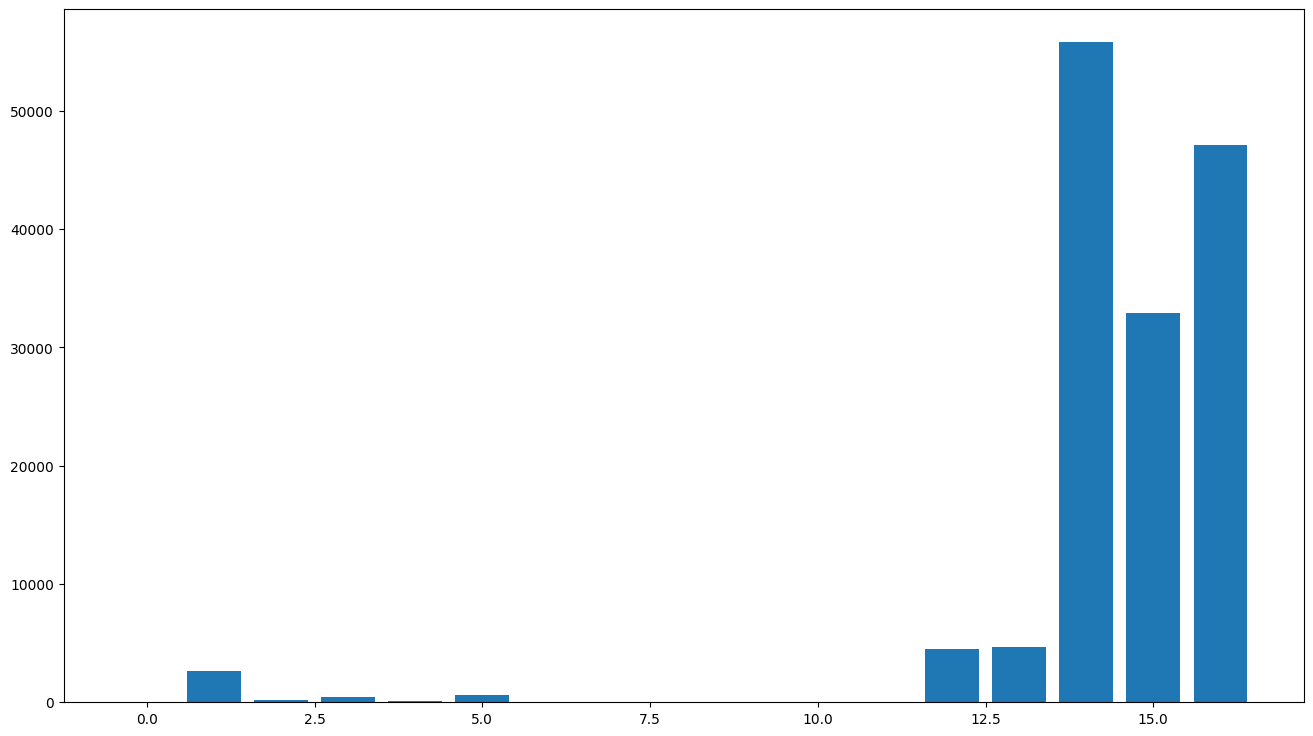

In [20]:
# X_train, y_train, X_test = df_train.drop(['yield'], axis = 1) , df_train['yield'] , df_test

# feature selection
X_train_fs, X_test_fs, fs = select_features(df_train.drop(['yield'], axis = 1), y_train = df_train['yield'] , X_test = df_test)
# what are scores for the features
for i in range(len(fs.scores_)):
  print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
# plt.ylabel()
# plt.xlabel()
plt.show()

Feature 0: 0.000000
Feature 1: 0.105379
Feature 2: 0.070390
Feature 3: 0.020371
Feature 4: 0.033237
Feature 5: 0.032696
Feature 6: 0.027706
Feature 7: 0.025058
Feature 8: 0.020014
Feature 9: 0.018383
Feature 10: 0.020318
Feature 11: 0.022806
Feature 12: 0.162043
Feature 13: 0.164804
Feature 14: 1.360085
Feature 15: 0.983426
Feature 16: 1.155263


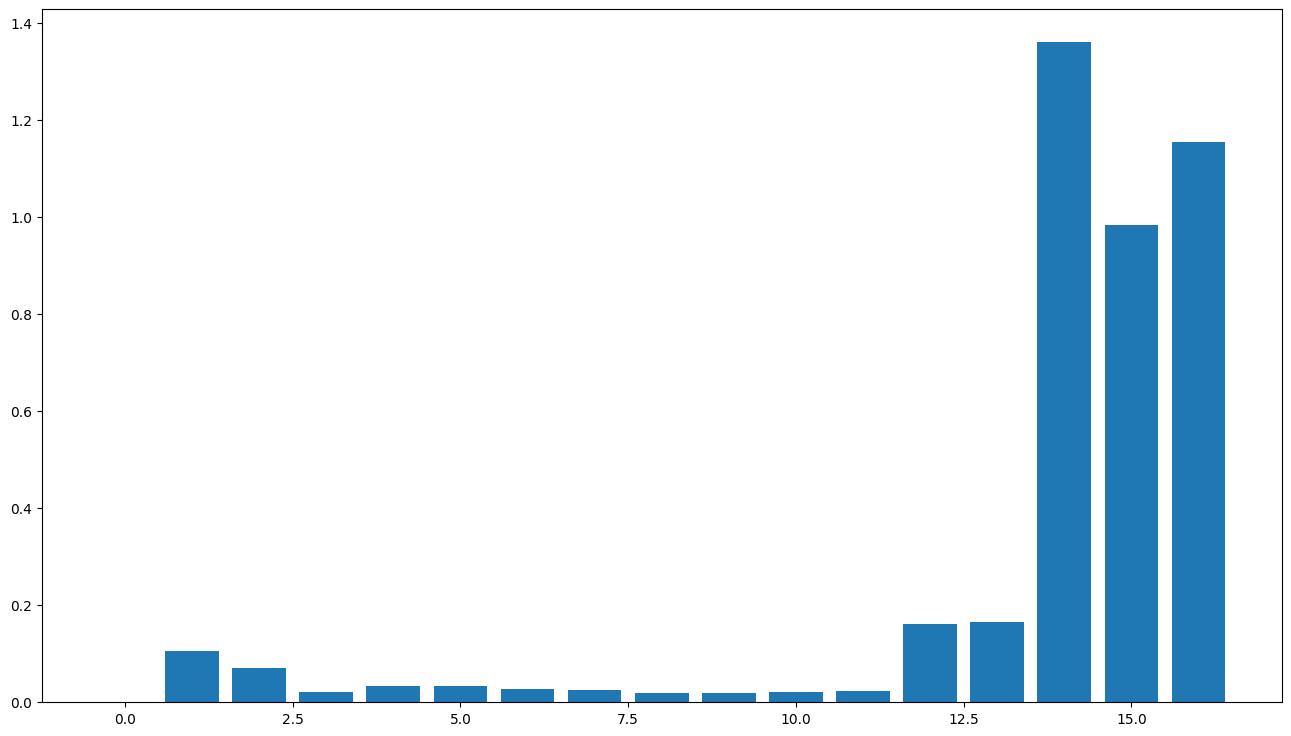

In [21]:
# mutual feature selection
X_train_fs_mut, X_test_fs_mut, fs_mut = select_features_mutual(df_train.drop(['yield'], axis = 1), y_train = df_train['yield'] , X_test = df_test)
# what are scores for the features
for i in range(len(fs_mut.scores_)):
  print('Feature %d: %f' % (i, fs_mut.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs_mut.scores_))], fs_mut.scores_)
#pd.DataFrame([i for i in range(len(fs_mut.scores_))], fs_mut.scores_).plot(kind='bar')

pyplot.show()

# Train and test split

In [22]:
X = df_train.drop(['yield'], axis=1)
y = df_train['yield']

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Model train and evaluation

### Without feature selection

In [23]:
# fit the model
model1 = LinearRegression()
model1.fit(X_train, y_train)
# evaluate the model
yhat1 = model1.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat1)
print('MAE: %.3f' % mae)

MAE: 377.257


### With feature selection - SelectKBest

In [24]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model2 = LinearRegression()
model2.fit(X_train_fs, y_train)
# evaluate the model
yhat2 = model2.predict(X_test_fs)
# evaluate predictions
mae2 = mean_absolute_error(y_test, yhat2)
print('MAE: %.3f' % mae)

MAE: 377.257


## SelectKBest tuning (the Number of Selected Features)

In [28]:
# define the evaluation method
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

# define the pipeline to evaluate
model = LinearRegression()
fs = SelectKBest(score_func=mutual_info_regression)
pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])

# define the grid
grid = dict()
grid['sel__k'] = [i for i in range(X.shape[1]-20, X.shape[1]+1)]

# define the grid search
search = GridSearchCV(pipeline, grid, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)

# perform the search
results = search.fit(X, y)

# summarize best
print('Best MAE: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
  print('>%.3f with: %r' % (mean, param))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 630.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.10/dist-p

Best MAE: -371.785
Best Config: {'sel__k': 12}
>nan with: {'sel__k': -3}
>nan with: {'sel__k': -2}
>nan with: {'sel__k': -1}
>nan with: {'sel__k': 0}
>-396.693 with: {'sel__k': 1}
>-381.405 with: {'sel__k': 2}
>-374.250 with: {'sel__k': 3}
>-372.348 with: {'sel__k': 4}
>-372.319 with: {'sel__k': 5}
>-372.607 with: {'sel__k': 6}
>-372.634 with: {'sel__k': 7}
>-372.398 with: {'sel__k': 8}
>-372.259 with: {'sel__k': 9}
>-372.161 with: {'sel__k': 10}
>-371.894 with: {'sel__k': 11}
>-371.785 with: {'sel__k': 12}
>-371.865 with: {'sel__k': 13}
>-371.992 with: {'sel__k': 14}
>-371.896 with: {'sel__k': 15}
>-371.849 with: {'sel__k': 16}
>-371.870 with: {'sel__k': 17}


## RFECV

In [25]:
min_features_to_select = 1  # Minimum number of features to consider
estimator = LinearRegression()
cv_rfecv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

rfecv = RFECV(
    estimator=estimator,
    step=1,
    cv=cv_rfecv,
    scoring="neg_mean_absolute_error",
    min_features_to_select=min_features_to_select,
    n_jobs=-1,
)

rfecv.fit(X, y)

print(f"Optimal number of features: {rfecv.n_features_}")

# summarize all features
for number, col in zip(range(X.shape[1]+1), X.columns):
  print('%s, Selected=%s, Rank: %d' % (col, rfecv.support_[number], rfecv.ranking_[number]))

Optimal number of features: 9
id, Selected=False, Rank: 9
clonesize, Selected=False, Rank: 6
honeybee, Selected=False, Rank: 7
bumbles, Selected=True, Rank: 1
andrena, Selected=True, Rank: 1
osmia, Selected=False, Rank: 2
MaxOfUpperTRange, Selected=False, Rank: 3
MinOfUpperTRange, Selected=False, Rank: 4
AverageOfUpperTRange, Selected=True, Rank: 1
MaxOfLowerTRange, Selected=False, Rank: 5
MinOfLowerTRange, Selected=True, Rank: 1
AverageOfLowerTRange, Selected=True, Rank: 1
RainingDays, Selected=False, Rank: 8
AverageRainingDays, Selected=True, Rank: 1
fruitset, Selected=True, Rank: 1
fruitmass, Selected=True, Rank: 1
seeds, Selected=True, Rank: 1


### RFECV tuning

In [34]:
# get a list of models to evaluate
def get_models():
  models = dict()
  # lr
  rfecv = RFECV(estimator=LinearRegression(), scoring="neg_mean_absolute_error")
  model = LinearRegression()
  models['lr'] = Pipeline(steps=[('s',rfecv),('m',model)])
  
  # svr
  # rfecv = RFECV(estimator=SVR(kernel='linear'), scoring="neg_mean_absolute_error")
  # model = LinearRegression()
  # models['svr'] = Pipeline(steps=[('s',rfecv),('m',model)])
  
  # ElasticNet
  rfecv = RFECV(estimator=ElasticNet(), scoring="neg_mean_absolute_error")
  model = LinearRegression()
  models['en'] = Pipeline(steps=[('s',rfecv),('m',model)])
  
  # rf
  # rfecv = RFECV(estimator=RandomForestRegressor(), scoring="neg_mean_absolute_error")
  # model = LinearRegression()
  # models['rfr'] = Pipeline(steps=[('s',rfecv),('m',model)])
  
  # gbm
  rfecv = RFECV(estimator=GradientBoostingRegressor(), scoring="neg_mean_absolute_error")
  model = LinearRegression()
  models['gbr'] = Pipeline(steps=[('s',rfecv),('m',model)])
  return models

In [30]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
  # cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
  scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
  RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
  return scores

In [37]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for i in tqdm(range(int(9e6))):
  for name, model in models.items():
    scores = evaluate_model(model, X, y)
    # print(type(scores))
    results.append(scores)
    # print(results)
    names.append(name)
    print('Model: %s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

  0%|          | 0/9000000 [00:00<?, ?it/s]

Model: lr -371.819 (8.019)
Model: en -376.461 (7.461)


  0%|          | 0/9000000 [00:35<?, ?it/s]


KeyboardInterrupt: ignored